In [18]:
from sklearn.datasets import load_breast_cancer, load_digits
import numpy as np
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split

In [19]:
def train(x, y):
    x0 = x[y == 0]
    x1 = x[y == 1]
    
    p10 = x0.sum(axis=0)/len(x0)
    p00 = 1 - p10
    p11 = x1.sum(axis=0)/len(x1)
    p01 = 1 - p11
    return (np.array([p00, p10]), np.array([p01, p11]))

def classify(x, p0, p1):
    return [(np.prod(np.choose(x_i, p0)) < np.prod(np.choose(x_i, p1))) + 0 for x_i in x]

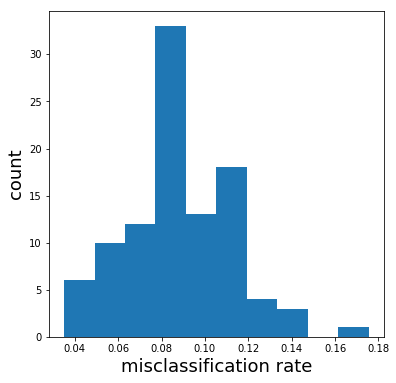

In [21]:
x_, y = load_breast_cancer(return_X_y=True)
m = np.median(x_, axis=0)
x = (x_ > m) + 0

mcrs = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.random.randint(10e5))

    p0, p1 = train(x_train, y_train)
    y_pred = classify(x_test, p0, p1)

    mcr = (y_pred != y_test).sum()/len(y_test)
    mcrs.append(mcr)

plt.figure(figsize=(6, 6))
plt.hist(mcrs)
plt.xlabel("misclassification rate", fontsize=18)
plt.ylabel("count", fontsize=18)
plt.show()

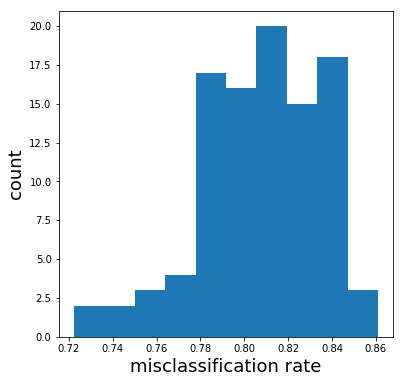

In [16]:
x_, y = load_digits(return_X_y=True)
x = (x_ > 8) + 0

mcrs = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=np.random.randint(10e5))

    p0, p1 = train(x_train, y_train)
    y_pred = classify(x_test, p0, p1)

    mcr = (y_pred != y_test).sum()/len(y_test)
    mcrs.append(mcr)

plt.figure(figsize=(6, 6))
plt.hist(mcrs)
plt.xlabel("misclassification rate", fontsize=18)
plt.ylabel("count", fontsize=18)
plt.show()

In [17]:
print(y_pred)

[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0]


In [33]:
np.random.randint(10)

9

In [95]:
x_, y = load_digits(return_X_y=True)
x = (x_ > 8) + 0

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=np.random.randint(10e5))
bnb = BernoulliNB()
y_pred = bnb.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 180 points : 16


In [103]:
x__ = x_.reshape(x_.size)

In [108]:
np.median(np.unique(x_))

8.0